In [3]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

In [29]:
def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
        node_size = [16 * graph.degree(n) for n in graph],
        node_color = [graph.depth[n] for n in graph],
        with_labels = False)
    matplotlib.pyplot.savefig('dog-net.pdf')
    matplotlib.pyplot.show()

In [30]:
dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)

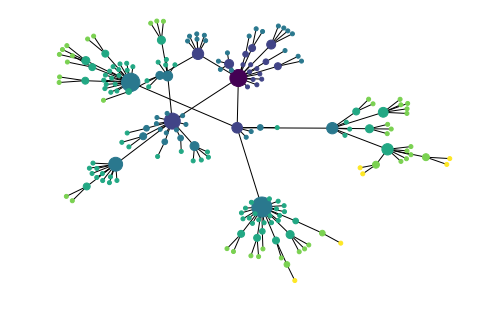

In [39]:
graph_draw(graph)